<a href="https://colab.research.google.com/github/maushamkumar/Pandas/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

In [102]:
data = pd.read_csv('/content/cancer_reg_processed.csv')

In [91]:
data.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [69]:
select_numberic = data.select_dtypes(include=np.number)

In [70]:
from scipy.stats import skew, normaltest
gaussian_cols = []
non_gaussian_cols = []
for col in select_numberic.columns:
  stats, p = normaltest(data[col])
  print('Statistics=%.3f, p=%.3f' % (stats, p))
  alpha = 0.05
  if p >alpha:
    gaussian_cols.append(col)
  else:
    non_gaussian_cols.append(col)


print((gaussian_cols))





Statistics=5028.465, p=0.000
Statistics=5314.434, p=0.000
Statistics=127.363, p=0.000
Statistics=943.641, p=0.000
Statistics=854.431, p=0.000
Statistics=5801.694, p=0.000
Statistics=408.566, p=0.000
Statistics=4449.679, p=0.000
Statistics=4715.992, p=0.000
Statistics=42.880, p=0.000
Statistics=48.305, p=0.000
Statistics=2293.395, p=0.000
Statistics=236.299, p=0.000
Statistics=508.655, p=0.000
Statistics=39.668, p=0.000
Statistics=1395.030, p=0.000
Statistics=55.596, p=0.000
Statistics=536.946, p=0.000
Statistics=87.619, p=0.000
Statistics=471.048, p=0.000
Statistics=73.543, p=0.000
Statistics=9.139, p=0.010
Statistics=20.036, p=0.000
Statistics=1.039, p=0.595
Statistics=114.894, p=0.000
Statistics=933.419, p=0.000
Statistics=1377.835, p=0.000
Statistics=4033.108, p=0.000
Statistics=3071.494, p=0.000
Statistics=218.834, p=0.000
Statistics=893.748, p=0.000
Statistics=55.722, p=0.000
Statistics=1290.293, p=0.000
Statistics=847.167, p=0.000
Statistics=10017.746, p=0.000
Statistics=10017.74

In [103]:
from scipy.stats import normaltest

numerical_columns = data.select_dtypes(include=np.number).columns
gaussian_cols = []
non_gaussian_cols = []
for col in numerical_columns:
    stat, p = normaltest(data[col])
    # print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        gaussian_cols.append(col)
    else:
        non_gaussian_cols.append(col)
print(gaussian_cols)

['pctpubliccoverage']


In [23]:
import matplotlib.pyplot as plt

In [57]:
len(gaussian_cols)

1

SyntaxError: invalid syntax (<ipython-input-28-95747527182f>, line 1)

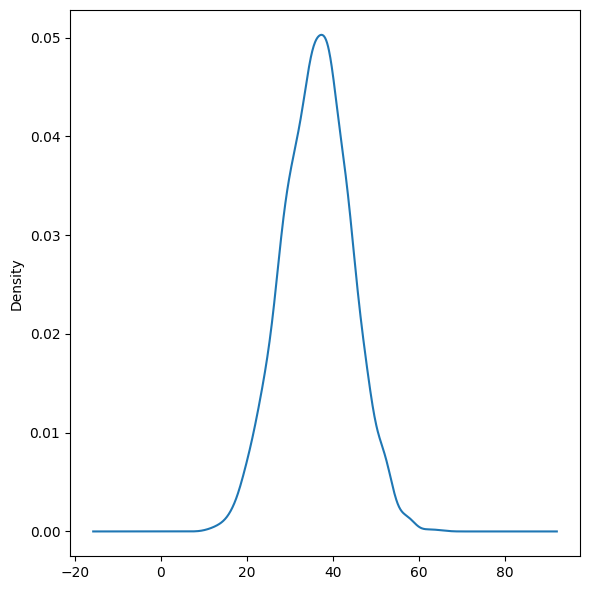

In [71]:
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
for i, col in enumerate(gaussian_cols):
  data[col].plot(kind='density', ax=axis, subplots=True, sharex=False)
plt.tight_layout()
plt.show()

In [104]:
gaussian_data = data[gaussian_cols]
basic_info_gaussian = gaussian_data.describe()

In [105]:
# Take the mean, std, max for every gaussian column
basic_info_gaussian = basic_info_gaussian.loc[['mean', 'std', 'min', 'max']]
basic_info_gaussian

,pctpubliccoverage
mean,36.252642
std,7.841741
min,11.200000
max,65.100000


In [95]:
# Dealing with outlier values for the incidence rate column
print('Highest allowed value:', basic_info_gaussian['pctpubliccoverage']['mean'] + 3 * basic_info_gaussian['pctpubliccoverage']['std'])
print('Lowest allowed value:', basic_info_gaussian['pctpubliccoverage']['mean'] - 3 * basic_info_gaussian['pctpubliccoverage']['std'])

data[(data['pctpubliccoverage'] > 59.77) | data['pctpubliccoverage'] < 12.72]

Highest allowed value: 59.777864755203105
Lowest allowed value: 12.727419130586192


,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
def deal_with_outliers(df, col, basic_info):
    highest_allowed = basic_info[col]["mean"] + 3*basic_info[col]["std"]
    lowest_allowed = basic_info[col]["mean"] - 3*basic_info[col]["std"]
    df = df[(df[col] < highest_allowed) | (df[col] > lowest_allowed)]
    return df

gaussian_data = trimmed_data1[gaussian_cols]
cols_have_outliers = []
for col in gaussian_cols:
    data = deal_with_outliers(gaussian_data, col, basic_info_gaussian)
    shape = data.shape
    if shape[0] > 0:
        cols_have_outliers.append(col)
print(cols_have_outliers)

['pctpubliccoverage']


In [43]:
cols_have_outliers

['pctpubliccoverage']

In [ ]:
# trimming
for col in cols_have_outliers:
    highest_allowed = basic_info_gaussian[col]["mean"] + 3*basic_info_gaussian[col]["std"]
    lowest_allowed = basic_info_gaussian[col]["mean"] - 3*basic_info_gaussian[col]["std"]
    trimmed_data = [(processed_data[col] < highest_allowed) & (processed_data[col] > lowest_allowed)]
trimmed_data



In [114]:
# Trimming outliers based on mean and standard deviation
trimmed_data = data.copy()  # Create a copy to avoid modifying the original data

for col in cols_have_outliers:
    highest_allowed = basic_info_gaussian[col]["mean"] + 3 * basic_info_gaussian[col]["std"]
    lowest_allowed = basic_info_gaussian[col]["mean"] - 3 * basic_info_gaussian[col]["std"]

    # Retain data points within the allowed range
    trimmed_data = trimmed_data1[(trimmed_data1[col] < highest_allowed) & (trimmed_data1[col] > lowest_allowed)]

# Display trimmed data
trimmed_data


,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
# trimmed_data1 = data.copy()
trimmed_data1

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
for col in cols_have_outliers:
    highest_allowed = basic_info_gaussian[col]["mean"] + 3*basic_info_gaussian[col]["std"]
    lowest_allowed = basic_info_gaussian[col]["mean"] - 3*basic_info_gaussian[col]["std"]
    trimmed_data = df[(df[col] > highest_allowed) | (df[col] < lowest_allowed)]
trimmed_data

,pctpubliccoverage
176,62.7
209,11.8
1486,65.1
2713,11.2
2740,62.2


In [119]:
# Caping
for col in cols_have_outliers:
    highest_allowed = basic_info_gaussian[col]["mean"] + 3*basic_info_gaussian[col]["std"]
    lowest_allowed = basic_info_gaussian[col]["mean"] - 3*basic_info_gaussian[col]["std"]
    capped_data = trimmed_data1.copy()
    capped_data.loc[capping[col] > highest_allowed, col] = highest_allowed
    capped_data.loc[capping[col] < lowest_allowed, col] = lowest_allowed

capped_data

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using Percentile method

In [120]:
def find_outliers_percentile(data, lower_percentile=1, upper_percentile=99):
    # Calculate the lower and upper percentiles
    lower_threshold = np.percentile(data, lower_percentile)
    upper_threshold = np.percentile(data, upper_percentile)

    # Identify outliers
    outliers = [x for x in data if x < lower_threshold or x > upper_threshold]

    return outliers, lower_threshold, upper_threshold

In [ ]:
gaussian_data = trimmed_data1[gaussian_cols]
cols_have_outliers = []
for col in gaussian_cols:
    data = deal_with_outliers(gaussian_data, col, basic_info_gaussian)
    shape = data.shape
    if shape[0] > 0:
        cols_have_outliers.append(col)
print(cols_have_outliers)

In [122]:
# find_outliers_percentile(trimmed_data1['pctpubliccoverage'])

In [123]:
import numpy as np

def cap_data(data, lower_percentile=5, upper_percentile=95):
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

gaussian_data = trimmed_data1[gaussian_cols]
cols_have_outliers = []
for col in gaussian_cols:
    data = cap_data(gaussian_data[col])
    shape = data.shape
    if shape[0] > 0:
        cols_have_outliers.append(col)
print(cols_have_outliers)

['pctpubliccoverage']


In [124]:
# Trimming outliers based on mean and standard deviation
trimmed_data = data.copy()  # Create a copy to avoid modifying the original data

for col in cols_have_outliers:
    highest_allowed = basic_info_gaussian[col]["mean"] + 3 * basic_info_gaussian[col]["std"]
    lowest_allowed = basic_info_gaussian[col]["mean"] - 3 * basic_info_gaussian[col]["std"]

    # Retain data points within the allowed range
    trimmed_data = trimmed_data1[(trimmed_data1[col] < highest_allowed) & (trimmed_data1[col] > lowest_allowed)]

# Display trimmed data
trimmed_data


,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
cols_to_remove = []
for col in trimmed_data1.columns:
  if trimmed_data1[col].nunique() < 10:
    cols_to_remove.append(col)
print(len(cols_to_remove))
data_for_skewness = trimmed_data1.drop(cols_to_remove, axis=1)

1870


In [126]:
trimmed_data1.shape

(3047, 1904)

In [133]:
def identify_skewed_columns(data, cols):
  skewed_data = []
  for col in cols:
    skew = data[col].skew()
    if skew > 1 or skew < -1:
      skewed_data.append(col)
  return skewed_data

In [134]:
skewed_cols = identify_skewed_columns(data_for_skewness, data_for_skewness.columns)
len(skewed_cols)

16

In [132]:
def identify_skewed_cols(df, cols):
    skewed_cols = []
    for col in cols:
        skew = df[col].skew()
        if skew > 1 or skew < -1:
            skewed_cols.append(col)
    return skewed_cols

skewed_cols = identify_skewed_cols(data_for_skewness, data_for_skewness.columns)
len(skewed_cols)

16

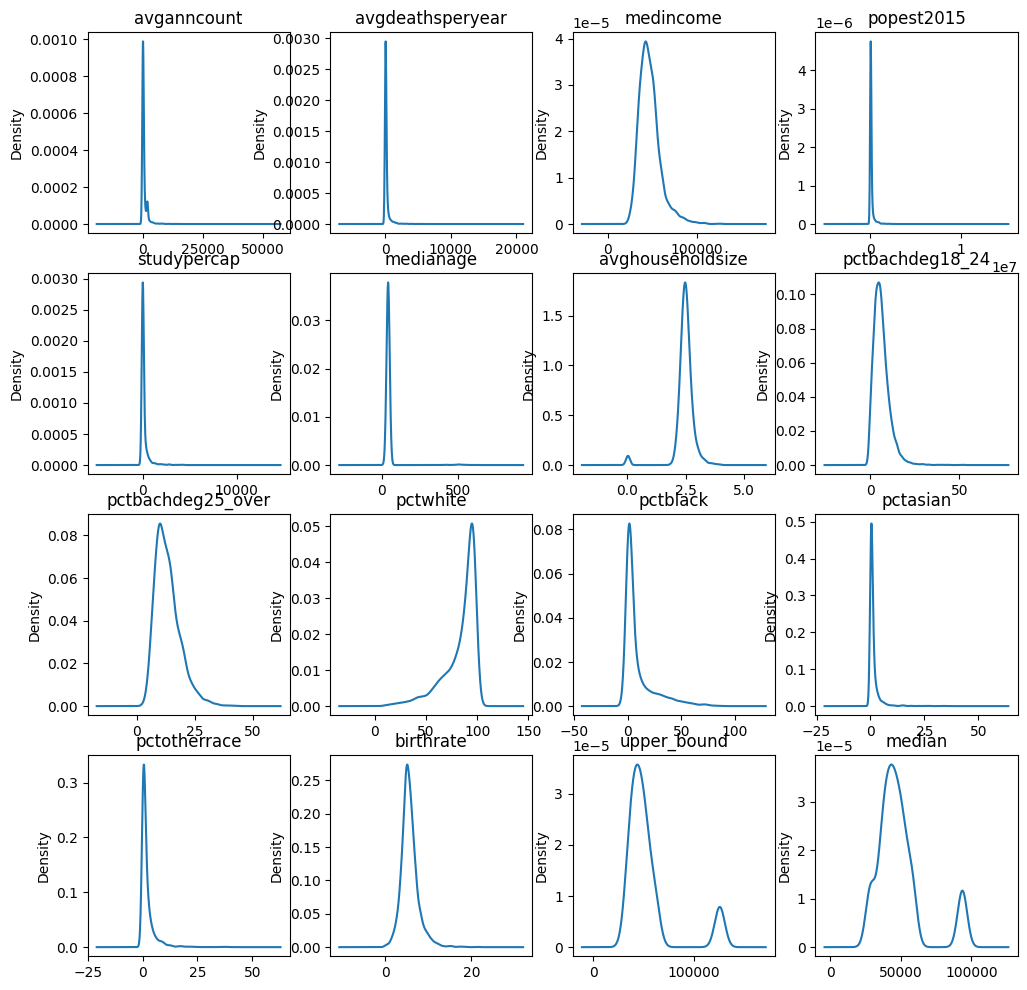

In [135]:
# Plot the distribution of the skewed columns is around 8 columns
fig, axis = plt.subplots(nrows = 4, ncols =4, figsize=(12, 12))

for i, col in enumerate(skewed_cols):
  # plot title
  axis[i//4, i%4].set_title(col)
  # plot the distribution
  data_for_skewness[col].plot(kind='density', ax=axis[i//4, i%4], subplots=True, sharex=False)

In [138]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [139]:
def box_plot (df, col):
  fig = go.Figure(data=[go.Box(y=df[col], boxpoints='outliers', jitter=0.3, pointpos=-1.8)])
  fig.update_layout(
      title='Boxplot of ' + col,
      yaxis_title=col,
      width=500,
      height=500)
  fig.show()

for col in skewed_cols:
  box_plot(trimmed_data1, col)